In [175]:
import pandas as pd

In [176]:
oppoi = pd.read_csv('/content/appointments.csv')

In [227]:
oppoi.head()

,AppointmentID,Date,PatientID,DoctorID,Specialty,Status
0,1,2025-05-30,44,6,Internal Medicine,No-Show
1,2,2025-06-28,37,5,Dentistry,Show
2,3,2025-05-16,46,9,Internal Medicine,Show
3,4,2025-06-29,34,5,Dentistry,No-Show
4,5,2025-07-20,42,8,Dermatology,Show


In [178]:
oppoi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AppointmentID  150 non-null    int64 
 1   Date           150 non-null    object
 2   PatientID      150 non-null    int64 
 3   DoctorID       150 non-null    int64 
 4   Specialty      150 non-null    object
 5   Status         150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [179]:

oppoi.drop_duplicates(inplace=True)

In [180]:
oppoi.describe()

,AppointmentID,PatientID,DoctorID
count,150.000000,150.000000,150.000000
mean,75.500000,24.786667,5.420000
std,43.445368,14.378202,2.817181
min,1.000000,1.000000,1.000000
25%,38.250000,13.250000,3.000000
50%,75.500000,24.000000,6.000000
75%,112.750000,37.750000,8.000000
max,150.000000,50.000000,10.000000


In [181]:
oppoi["Date"] = pd.to_datetime(oppoi["Date"], errors="coerce")


In [182]:
oppoi.dtypes

,0
AppointmentID,int64
Date,datetime64[ns]
PatientID,int64
DoctorID,int64
Specialty,object
Status,object


In [183]:
import matplotlib.pyplot as plt


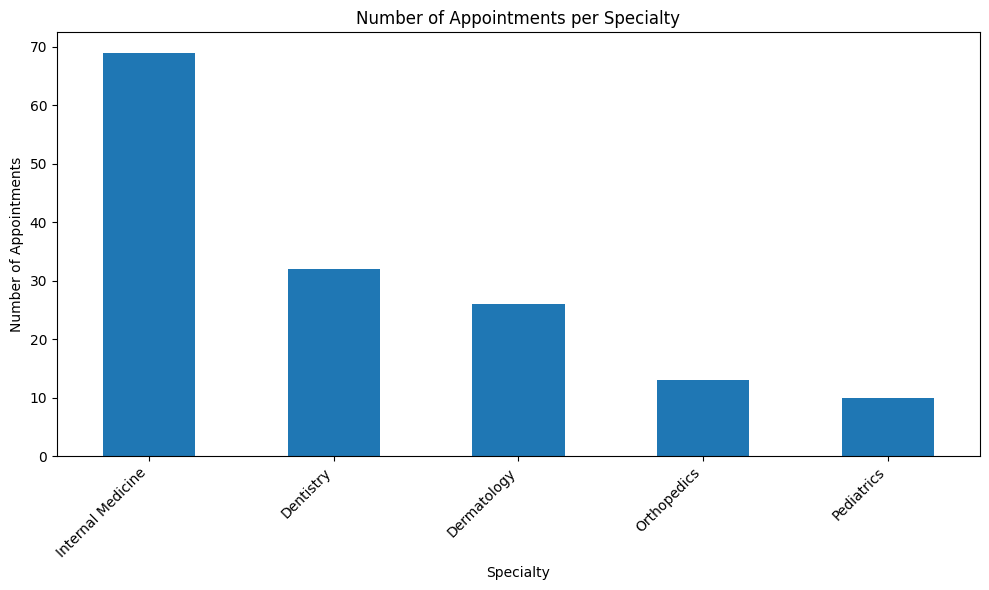

In [184]:
specialty_counts = oppoi['Specialty'].value_counts()
plt.figure(figsize=(10, 6))
specialty_counts.plot(kind='bar')
plt.title('Number of Appointments per Specialty')
plt.xlabel('Specialty')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [185]:
status_counts = oppoi['Status'].value_counts()
status_percentages = status_counts / len(oppoi) * 100

print("Percentage of appointments:")
print(status_percentages)

Percentage of appointments:
Status
Show       76.0
No-Show    24.0
Name: count, dtype: float64


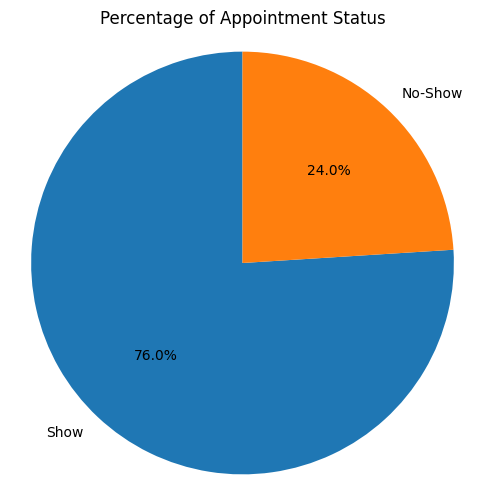

In [186]:
plt.figure(figsize=(6, 6))
plt.pie(status_percentages, labels=status_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Appointment Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [187]:

appointment_status_by_specialty = oppoi.groupby(['Specialty', 'Status']).size().unstack(fill_value=0)
appointment_status_by_specialty

Status,No-Show,Show
Specialty,,
Dentistry,9,23
Dermatology,7,19
Internal Medicine,16,53
Orthopedics,4,9
Pediatrics,0,10


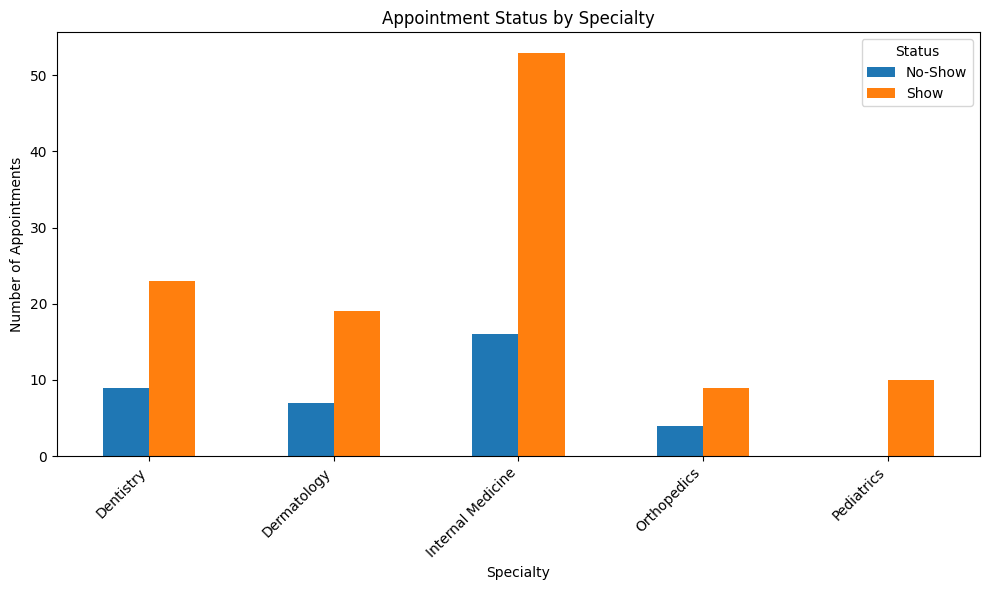

In [188]:

 appointment_status_by_specialty.plot(kind='bar', figsize=(10, 6))
 plt.title('Appointment Status by Specialty')
 plt.xlabel('Specialty')
 plt.ylabel('Number of Appointments')
 plt.xticks(rotation=45, ha='right')
 plt.tight_layout()
 plt.show()

In [189]:
doct=pd.read_csv('/content/doctors.csv')
doct.head()

,DoctorID,DoctorName,Specialty
0,1,Dr. Ahmed,Internal Medicine
1,2,Dr. Belal,Pediatrics
2,3,Dr. Mohamed,Internal Medicine
3,4,Dr. Dalia,Dermatology
4,5,Dr. Esraa,Dentistry


In [190]:
doct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DoctorID    10 non-null     int64 
 1   DoctorName  10 non-null     object
 2   Specialty   10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [191]:
doct.drop_duplicates(inplace=True)

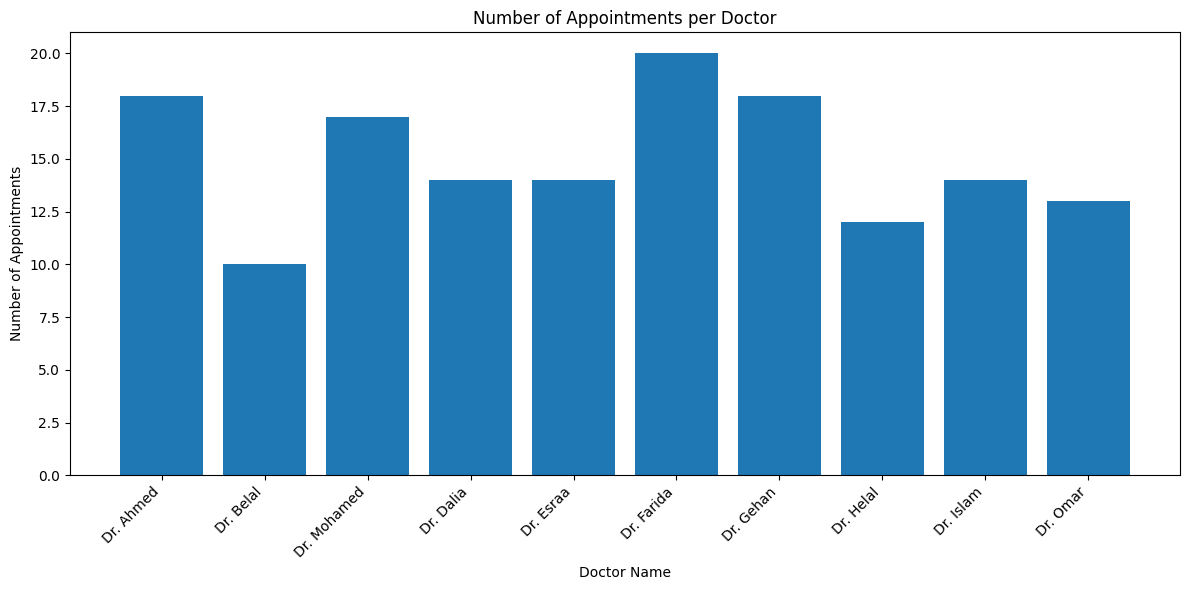

In [192]:
plt.figure(figsize=(12, 6))
plt.bar(doctor_appointment_counts['DoctorName'], doctor_appointment_counts['Appointment Count'])
plt.title('Number of Appointments per Doctor')
plt.xlabel('Doctor Name')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [193]:
print("number of doctors per specialty")
print(doct['Specialty'].value_counts())

number of doctors per specialty
Specialty
Internal Medicine    4
Dermatology          2
Dentistry            2
Pediatrics           1
Orthopedics          1
Name: count, dtype: int64


In [194]:
exp=pd.read_csv('/content/expenses.csv')
exp.head()


,ExpenseID,Day,Month,Year,Type,Amount
0,1,4,7,2025,Medical Supplies,2784
1,2,7,5,2025,Utilities,1241
2,3,10,6,2025,Medical Supplies,2916
3,4,29,7,2025,Utilities,2883
4,5,31,5,2025,Salaries,4477


In [195]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ExpenseID  30 non-null     int64 
 1   Day        30 non-null     int64 
 2   Month      30 non-null     int64 
 3   Year       30 non-null     int64 
 4   Type       30 non-null     object
 5   Amount     30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [196]:
exp.drop_duplicates(inplace=True)

In [197]:
exp['Date'] = pd.to_datetime(exp[['Year', 'Month', 'Day']])
exp.head()

,ExpenseID,Day,Month,Year,Type,Amount,Date
0,1,4,7,2025,Medical Supplies,2784,2025-07-04
1,2,7,5,2025,Utilities,1241,2025-05-07
2,3,10,6,2025,Medical Supplies,2916,2025-06-10
3,4,29,7,2025,Utilities,2883,2025-07-29
4,5,31,5,2025,Salaries,4477,2025-05-31


In [198]:
exp.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)


In [199]:
exp['Date'] = pd.to_datetime(exp['Date'])
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ExpenseID  30 non-null     int64         
 1   Type       30 non-null     object        
 2   Amount     30 non-null     int64         
 3   Date       30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ KB


In [200]:
exp.head()

,ExpenseID,Type,Amount,Date
0,1,Medical Supplies,2784,2025-07-04
1,2,Utilities,1241,2025-05-07
2,3,Medical Supplies,2916,2025-06-10
3,4,Utilities,2883,2025-07-29
4,5,Salaries,4477,2025-05-31


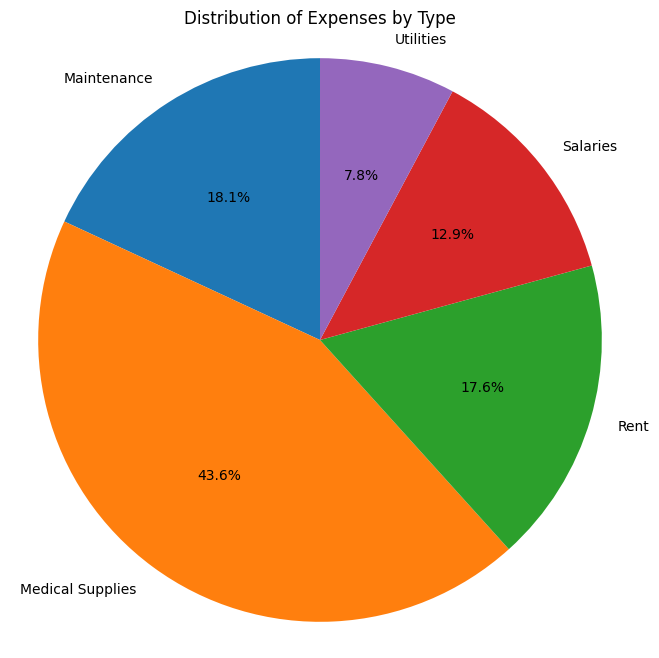

In [201]:
expense_type_totals = exp.groupby('Type')['Amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(expense_type_totals, labels=expense_type_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Expenses by Type')
plt.axis('equal')
plt.show()

In [202]:
total_expenses_month = exp.groupby(exp['Date'].dt.to_period('M'))['Amount'].sum()
print("Total expenses per month:")
print(total_expenses_month)

Total expenses per month:
Date
2025-05    40374
2025-06    39085
2025-07    44074
Freq: M, Name: Amount, dtype: int64


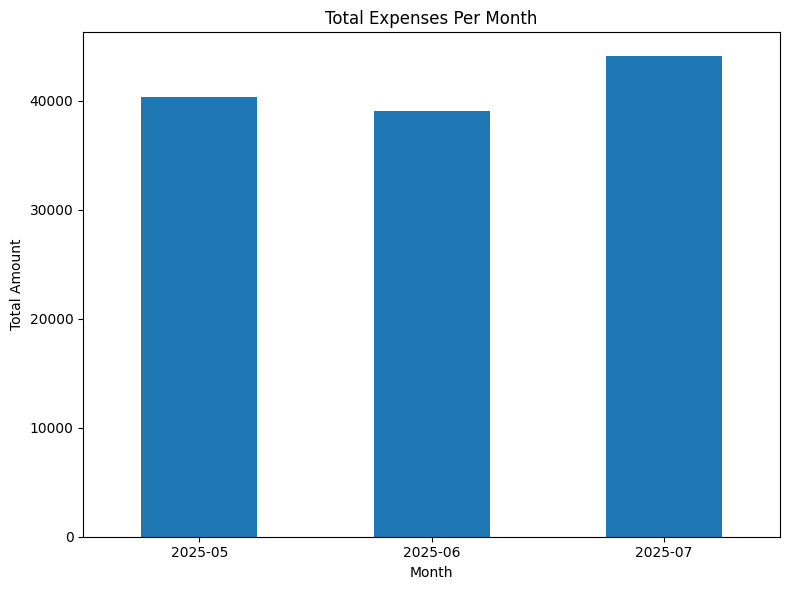

In [203]:
plt.figure(figsize=(8, 6))
total_expenses_month.plot(kind='bar')
plt.title('Total Expenses Per Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [204]:
patient=pd.read_csv('/content/patients.csv')
patient.head()

,PatientID,Name,Gender,Age,City
0,1,Patient 1,f,26,Giza
1,2,Patient 2,Male,20,Giza
2,3,Patient 3,f,25,Mansoura
3,4,Patient 4,f,42,Mansoura
4,5,Patient 5,f,29,Mansoura


In [205]:
patient.drop('Name', axis=1, inplace=True)
display(patient.head())

,PatientID,Gender,Age,City
0,1,f,26,Giza
1,2,Male,20,Giza
2,3,f,25,Mansoura
3,4,f,42,Mansoura
4,5,f,29,Mansoura


In [206]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  50 non-null     int64 
 1   Gender     50 non-null     object
 2   Age        50 non-null     int64 
 3   City       50 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [207]:
patient.drop_duplicates(inplace=True)

In [208]:
gender_counts = patient['Gender'].value_counts()
gender_counts

,count
Gender,
f,30
Male,20


عدد الذكور والإناث:
Gender
f       30
Male    20
Name: count, dtype: int64


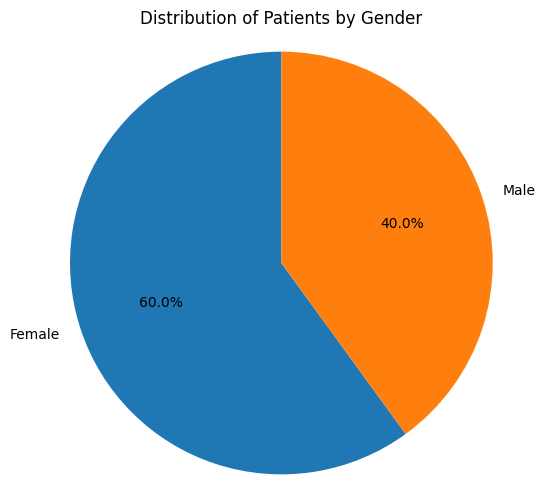

In [209]:
gender_counts = patient['Gender'].value_counts()
print("عدد الذكور والإناث:")
print(gender_counts)

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patients by Gender')
plt.axis('equal')
plt.show()

In [210]:
patient['Age'].mean()

np.float64(45.14)

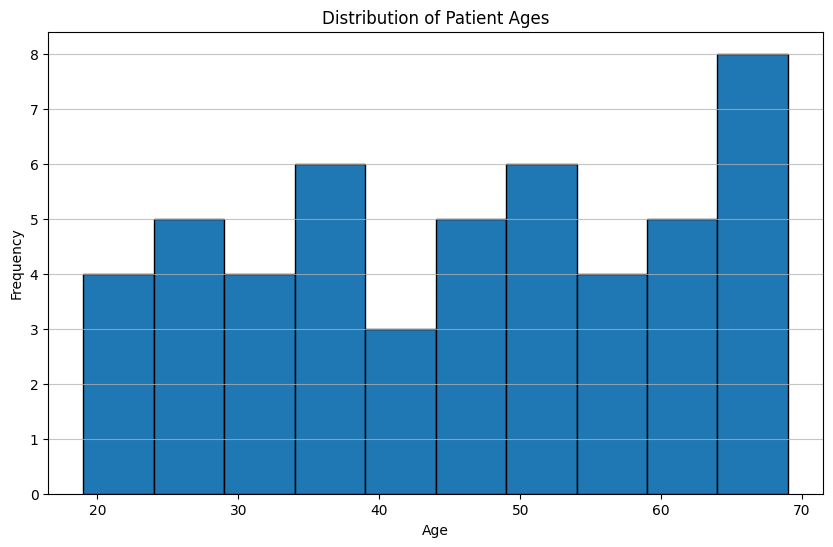

In [211]:
plt.figure(figsize=(10, 6))
plt.hist(patient['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [212]:
patient['City'].value_counts()

,count
City,
Cairo,12
Giza,11
Mansoura,11
Alexandria,7
Tanta,5
Tanta,4


In [213]:
patient['City'] = patient['City'].str.strip()
display(patient['City'].value_counts())

,count
City,
Cairo,12
Giza,11
Mansoura,11
Tanta,9
Alexandria,7


In [214]:
merged_df = pd.merge(oppoi, patient, on='PatientID')
display(merged_df.head())

,AppointmentID,Date,PatientID,DoctorID,Specialty,Status,Gender,Age,City
0,1,2025-05-30,44,6,Internal Medicine,No-Show,f,28,Alexandria
1,2,2025-06-28,37,5,Dentistry,Show,f,19,Giza
2,3,2025-05-16,46,9,Internal Medicine,Show,Male,65,Tanta
3,4,2025-06-29,34,5,Dentistry,No-Show,f,38,Cairo
4,5,2025-07-20,42,8,Dermatology,Show,Male,66,Mansoura


In [215]:
appointments_per_city = merged_df.groupby('City').size()
print("Number of appointments per city:")
print(appointments_per_city)

Number of appointments per city:
City
Alexandria    14
Cairo         41
Giza          34
Mansoura      39
Tanta         22
dtype: int64


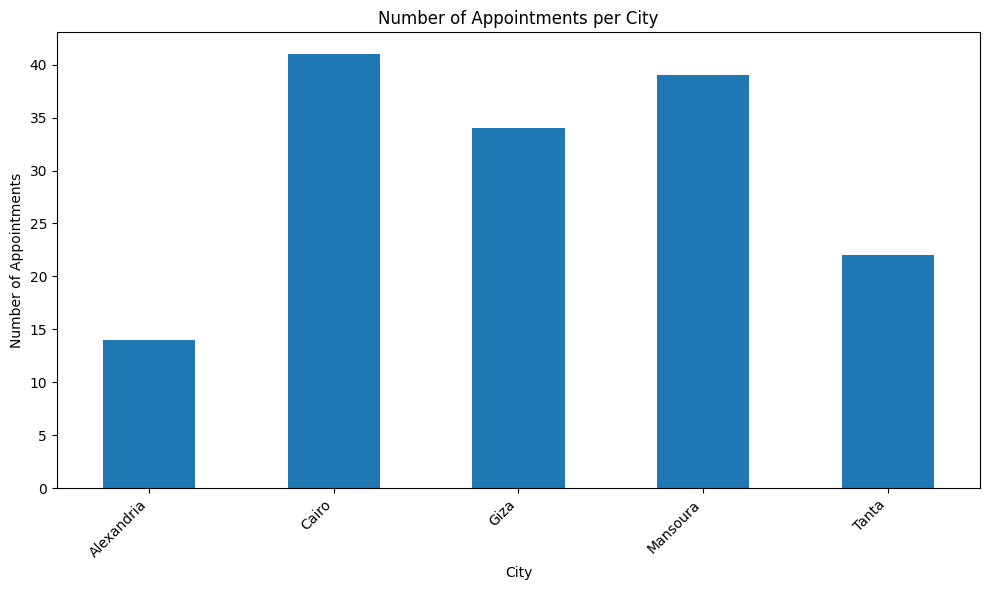

In [216]:
plt.figure(figsize=(10, 6))
appointments_per_city.plot(kind='bar')
plt.title('Number of Appointments per City')
plt.xlabel('City')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [217]:
reve=pd.read_csv('/content/revenues.csv')
reve.head()

,RevenueID,Date,Specialty,Revenue
0,1,6/12/2025,Dermatology,14165
1,2,5/8/2025,Dentistry,8689
2,3,7/11/2025,Orthopedics,14142
3,4,6/14/2025,Dentistry,19844
4,5,7/22/2025,Dermatology,18698


In [218]:
reve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RevenueID  30 non-null     int64 
 1   Date       30 non-null     object
 2   Specialty  30 non-null     object
 3   Revenue    30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [219]:
reve.drop_duplicates(inplace=True)

In [220]:
reve['Date'] = pd.to_datetime(reve['Date'])
reve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   RevenueID  30 non-null     int64         
 1   Date       30 non-null     datetime64[ns]
 2   Specialty  30 non-null     object        
 3   Revenue    30 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ KB


In [221]:
reve.describe(include='all')

,RevenueID,Date,Specialty,Revenue
count,30.000000,30,30,30.000000
unique,NaN,NaN,5,NaN
top,NaN,NaN,Dermatology,NaN
freq,NaN,NaN,10,NaN
mean,15.500000,2025-06-17 21:36:00,NaN,12759.633333
min,1.000000,2025-05-03 00:00:00,NaN,5980.000000
25%,8.250000,2025-06-01 18:00:00,NaN,9196.000000
50%,15.500000,2025-06-19 00:00:00,NaN,13115.000000
75%,22.750000,2025-07-10 00:00:00,NaN,16307.000000
max,30.000000,2025-07-22 00:00:00,NaN,19844.000000


In [222]:

monthly_revenue = reve.groupby(reve['Date'].dt.to_period('M'))['Revenue'].sum()
print("total revrnue monthly")
print(monthly_revenue)

total revrnue monthly
Date
2025-05     79834
2025-06    181724
2025-07    121231
Freq: M, Name: Revenue, dtype: int64


In [223]:
revenue_per_specialty = reve.groupby('Specialty')['Revenue'].sum()
print("total revenue for Spacialty")
print(revenue_per_specialty)

total revenue for Spacialty
Specialty
Dentistry             43999
Dermatology          140768
Internal Medicine    114554
Orthopedics           47328
Pediatrics            36140
Name: Revenue, dtype: int64


<Axes: xlabel='Specialty'>

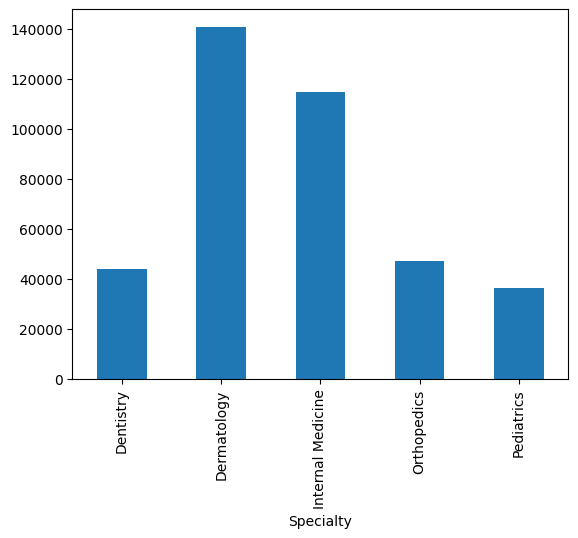

In [224]:
revenue_per_specialty.plot(kind='bar')

In [225]:
daily_revenue = reve.groupby('Date')['Revenue'].sum()
average_daily_revenue = daily_revenue.mean()
print("Average daily revenue:", average_daily_revenue)

Average daily revenue: 15949.541666666666


<Axes: xlabel='Specialty'>

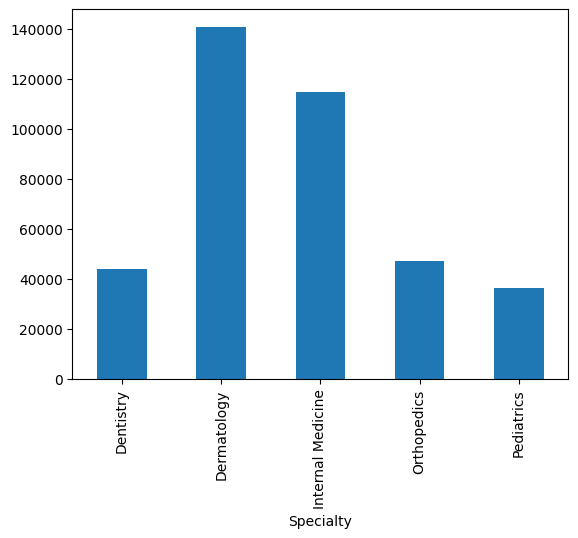

In [228]:
revenue_per_specialty.plot(kind='bar')

<Axes: xlabel='Specialty'>

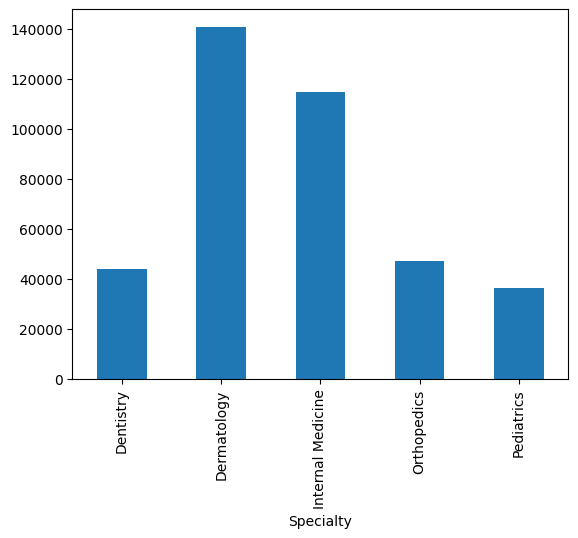

In [229]:
revenue_per_specialty.plot(kind='bar')

<Axes: xlabel='Specialty'>

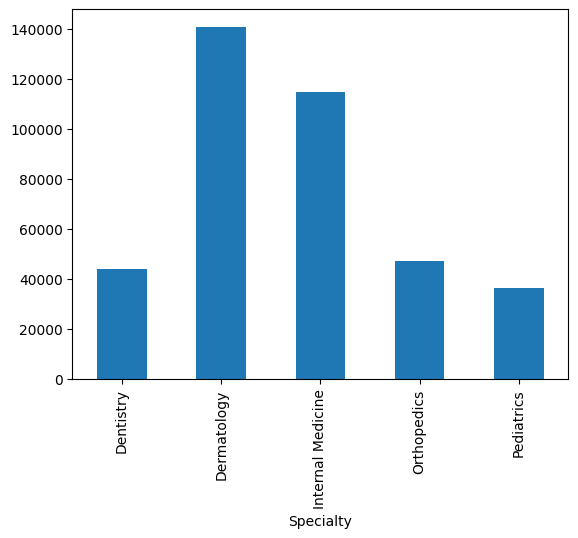

In [230]:
revenue_per_specialty.plot(kind='bar')